In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [3]:
eval_loss_df = pd.read_csv('eval_loss.csv')
train_loss_df = pd.read_csv('train_loss.csv')
eval_blue = pd.read_csv('eval_blue_4.csv')
eval_ppl = pd.read_csv('eval_ppl.csv')

In [4]:
eval_loss_df.head()

,Step,ruby-20231106_104248 - eval_loss,ruby-20231106_104248 - eval_loss__MIN,ruby-20231106_104248 - eval_loss__MAX,php-20231102_160100 - eval_loss,php-20231102_160100 - eval_loss__MIN,php-20231102_160100 - eval_loss__MAX,java-20231101_090754 - eval_loss,java-20231101_090754 - eval_loss__MIN,java-20231101_090754 - eval_loss__MAX,go-20231031_120958 - eval_loss,go-20231031_120958 - eval_loss__MIN,go-20231031_120958 - eval_loss__MAX,javascript-20231029_122314 - eval_loss,javascript-20231029_122314 - eval_loss__MIN,javascript-20231029_122314 - eval_loss__MAX,python-20231028_204326 - eval_loss,python-20231028_204326 - eval_loss__MIN,python-20231028_204326 - eval_loss__MAX
0,379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.05118,3.05118,3.05118,NaN,NaN,NaN,NaN,NaN,NaN
1,758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.68533,2.68533,2.68533,NaN,NaN,NaN,NaN,NaN,NaN
2,1137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58393,2.58393,2.58393,NaN,NaN,NaN,NaN,NaN,NaN
3,2600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.39311,2.39311,2.39311,NaN,NaN,NaN
4,2879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.43796,2.43796,2.43796


In [5]:
# non null count
eval_loss_df.notna().sum()

Step                                           18
ruby-20231106_104248 - eval_loss                3
ruby-20231106_104248 - eval_loss__MIN           3
ruby-20231106_104248 - eval_loss__MAX           3
php-20231102_160100 - eval_loss                 3
php-20231102_160100 - eval_loss__MIN            3
php-20231102_160100 - eval_loss__MAX            3
java-20231101_090754 - eval_loss                3
java-20231101_090754 - eval_loss__MIN           3
java-20231101_090754 - eval_loss__MAX           3
go-20231031_120958 - eval_loss                  3
go-20231031_120958 - eval_loss__MIN             3
go-20231031_120958 - eval_loss__MAX             3
javascript-20231029_122314 - eval_loss          3
javascript-20231029_122314 - eval_loss__MIN     3
javascript-20231029_122314 - eval_loss__MAX     3
python-20231028_204326 - eval_loss              3
python-20231028_204326 - eval_loss__MIN         3
python-20231028_204326 - eval_loss__MAX         3
dtype: int64

In [6]:
train_loss_df.head()

,Step,ruby-20231106_104248 - train_loss,ruby-20231106_104248 - train_loss__MIN,ruby-20231106_104248 - train_loss__MAX,php-20231102_160100 - train_loss,php-20231102_160100 - train_loss__MIN,php-20231102_160100 - train_loss__MAX,java-20231101_090754 - train_loss,java-20231101_090754 - train_loss__MIN,java-20231101_090754 - train_loss__MAX,go-20231031_120958 - train_loss,go-20231031_120958 - train_loss__MIN,go-20231031_120958 - train_loss__MAX,javascript-20231029_122314 - train_loss,javascript-20231029_122314 - train_loss__MIN,javascript-20231029_122314 - train_loss__MAX,python-20231028_204326 - train_loss,python-20231028_204326 - train_loss__MIN,python-20231028_204326 - train_loss__MAX
0,0,7.6319,7.6319,7.6319,8.3626,8.3626,8.3626,8.0972,8.0972,8.0972,8.6469,8.6469,8.6469,8.0683,8.0683,8.0683,7.7768,7.7768,7.7768
1,10,7.6264,7.6264,7.6264,8.1547,8.1547,8.1547,8.1066,8.1066,8.1066,8.5629,8.5629,8.5629,8.1027,8.1027,8.1027,7.7824,7.7824,7.7824
2,20,7.5576,7.5576,7.5576,8.0999,8.0999,8.0999,8.1170,8.1170,8.1170,7.9999,7.9999,7.9999,7.9876,7.9876,7.9876,7.7227,7.7227,7.7227
3,30,7.4654,7.4654,7.4654,8.0192,8.0192,8.0192,8.0424,8.0424,8.0424,7.4969,7.4969,7.4969,7.8428,7.8428,7.8428,7.6194,7.6194,7.6194
4,40,7.3480,7.3480,7.3480,7.9528,7.9528,7.9528,7.9628,7.9628,7.9628,7.1005,7.1005,7.1005,7.6739,7.6739,7.6739,7.4813,7.4813,7.4813


In [7]:
train_loss_df.notna().sum()

Step                                            1780
ruby-20231106_104248 - train_loss                874
ruby-20231106_104248 - train_loss__MIN           874
ruby-20231106_104248 - train_loss__MAX           874
php-20231102_160100 - train_loss                1447
php-20231102_160100 - train_loss__MIN           1447
php-20231102_160100 - train_loss__MAX           1447
java-20231101_090754 - train_loss               1780
java-20231101_090754 - train_loss__MIN          1780
java-20231101_090754 - train_loss__MAX          1780
go-20231031_120958 - train_loss                  114
go-20231031_120958 - train_loss__MIN             114
go-20231031_120958 - train_loss__MAX             114
javascript-20231029_122314 - train_loss          781
javascript-20231029_122314 - train_loss__MIN     781
javascript-20231029_122314 - train_loss__MAX     781
python-20231028_204326 - train_loss              864
python-20231028_204326 - train_loss__MIN         864
python-20231028_204326 - train_loss__MAX      

In [8]:
eval_blue.head()

,Step,ruby-20231106_104248 - eval_bleu_4,ruby-20231106_104248 - eval_bleu_4__MIN,ruby-20231106_104248 - eval_bleu_4__MAX,php-20231102_160100 - eval_bleu_4,php-20231102_160100 - eval_bleu_4__MIN,php-20231102_160100 - eval_bleu_4__MAX,java-20231101_090754 - eval_bleu_4,java-20231101_090754 - eval_bleu_4__MIN,java-20231101_090754 - eval_bleu_4__MAX,go-20231031_120958 - eval_bleu_4,go-20231031_120958 - eval_bleu_4__MIN,go-20231031_120958 - eval_bleu_4__MAX,javascript-20231029_122314 - eval_bleu_4,javascript-20231029_122314 - eval_bleu_4__MIN,javascript-20231029_122314 - eval_bleu_4__MAX,python-20231028_204326 - eval_bleu_4,python-20231028_204326 - eval_bleu_4__MIN,python-20231028_204326 - eval_bleu_4__MAX
0,379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.43,17.43,17.43,NaN,NaN,NaN,NaN,NaN,NaN
1,758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.96,23.96,23.96,NaN,NaN,NaN,NaN,NaN,NaN
2,1137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.05,26.05,26.05,NaN,NaN,NaN,NaN,NaN,NaN
3,2600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.07,31.07,31.07,NaN,NaN,NaN
4,2879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.84,24.84,24.84


In [9]:
eval_blue.notna().sum()

Step                                             18
ruby-20231106_104248 - eval_bleu_4                3
ruby-20231106_104248 - eval_bleu_4__MIN           3
ruby-20231106_104248 - eval_bleu_4__MAX           3
php-20231102_160100 - eval_bleu_4                 3
php-20231102_160100 - eval_bleu_4__MIN            3
php-20231102_160100 - eval_bleu_4__MAX            3
java-20231101_090754 - eval_bleu_4                3
java-20231101_090754 - eval_bleu_4__MIN           3
java-20231101_090754 - eval_bleu_4__MAX           3
go-20231031_120958 - eval_bleu_4                  3
go-20231031_120958 - eval_bleu_4__MIN             3
go-20231031_120958 - eval_bleu_4__MAX             3
javascript-20231029_122314 - eval_bleu_4          3
javascript-20231029_122314 - eval_bleu_4__MIN     3
javascript-20231029_122314 - eval_bleu_4__MAX     3
python-20231028_204326 - eval_bleu_4              3
python-20231028_204326 - eval_bleu_4__MIN         3
python-20231028_204326 - eval_bleu_4__MAX         3
dtype: int64

In [10]:
eval_ppl.head()

,Step,ruby-20231106_104248 - eval_ppl,ruby-20231106_104248 - eval_ppl__MIN,ruby-20231106_104248 - eval_ppl__MAX,php-20231102_160100 - eval_ppl,php-20231102_160100 - eval_ppl__MIN,php-20231102_160100 - eval_ppl__MAX,java-20231101_090754 - eval_ppl,java-20231101_090754 - eval_ppl__MIN,java-20231101_090754 - eval_ppl__MAX,go-20231031_120958 - eval_ppl,go-20231031_120958 - eval_ppl__MIN,go-20231031_120958 - eval_ppl__MAX,javascript-20231029_122314 - eval_ppl,javascript-20231029_122314 - eval_ppl__MIN,javascript-20231029_122314 - eval_ppl__MAX,python-20231028_204326 - eval_ppl,python-20231028_204326 - eval_ppl__MIN,python-20231028_204326 - eval_ppl__MAX
0,379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.14032,21.14032,21.14032,NaN,NaN,NaN,NaN,NaN,NaN
1,758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.66304,14.66304,14.66304,NaN,NaN,NaN,NaN,NaN,NaN
2,1137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.24916,13.24916,13.24916,NaN,NaN,NaN,NaN,NaN,NaN
3,2600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.94748,10.94748,10.94748,NaN,NaN,NaN
4,2879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.44971,11.44971,11.44971


In [11]:
eval_ppl.notna().sum()

Step                                          18
ruby-20231106_104248 - eval_ppl                3
ruby-20231106_104248 - eval_ppl__MIN           3
ruby-20231106_104248 - eval_ppl__MAX           3
php-20231102_160100 - eval_ppl                 3
php-20231102_160100 - eval_ppl__MIN            3
php-20231102_160100 - eval_ppl__MAX            3
java-20231101_090754 - eval_ppl                3
java-20231101_090754 - eval_ppl__MIN           3
java-20231101_090754 - eval_ppl__MAX           3
go-20231031_120958 - eval_ppl                  3
go-20231031_120958 - eval_ppl__MIN             3
go-20231031_120958 - eval_ppl__MAX             3
javascript-20231029_122314 - eval_ppl          3
javascript-20231029_122314 - eval_ppl__MIN     3
javascript-20231029_122314 - eval_ppl__MAX     3
python-20231028_204326 - eval_ppl              3
python-20231028_204326 - eval_ppl__MIN         3
python-20231028_204326 - eval_ppl__MAX         3
dtype: int64

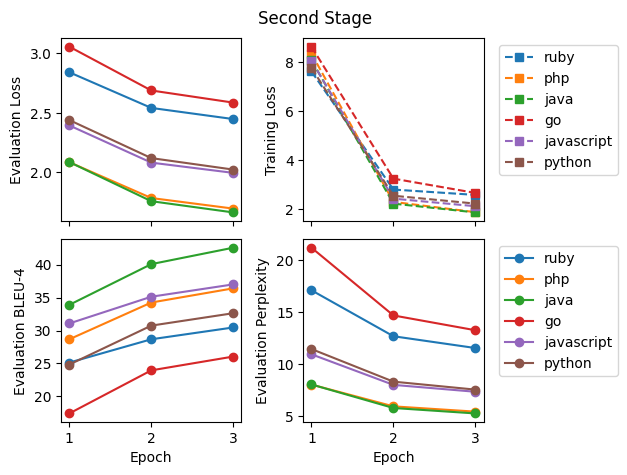

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1, ylabel='Evaluation Loss', xticks=range(1,4))
ax2 = fig.add_subplot(2, 2, 2, sharex=ax1, ylabel='Training Loss')
ax3 = fig.add_subplot(2, 2, 3, sharex=ax1, ylabel='Evaluation BLEU-4', xlabel='Epoch')
ax4 = fig.add_subplot(2, 2, 4, sharex=ax1, ylabel='Evaluation Perplexity', xlabel='Epoch')
for column_index in range(1, 18, 3):
    eval_loss_column = eval_loss_df.columns[column_index]
    train_loss_column = train_loss_df.columns[column_index]
    train_loss_serie = train_loss_df[train_loss_column].dropna()
    train_loss_step = math.ceil(len(train_loss_serie)/3)

    ax1.plot(range(1,4), eval_loss_df[eval_loss_column].dropna().values, label=eval_loss_column.split('-')[0], marker='o',)
    plt.setp(ax1.get_xticklabels(), visible=False)

    ax2.plot(range(1,4), train_loss_serie[train_loss_serie.index[::train_loss_step]].values, label=train_loss_column.split('-')[0], linestyle='dashed', marker="s")
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.setp(ax2.get_xticklabels(), visible=False)

    ax3.plot(range(1,4), eval_blue[eval_blue.columns[column_index]].dropna().values, label=eval_blue.columns[column_index].split('-')[0], marker='o',)
    
    ax4.plot(range(1,4), eval_ppl[eval_ppl.columns[column_index]].dropna().values, label=eval_ppl.columns[column_index].split('-')[0], marker='o',)
    ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
fig.subplots_adjust(top=0.92)
fig.suptitle("Second Stage")
plt.show()